In [44]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()

X = iris.data[:, (2,3)]
X_b= np.c_[np.ones([len(X), 1]), X]
y = iris.target

In [45]:
#print(iris["target"][:150])
#print(y[:150])
test_ratio = 0.2
val_ratio = 0.2
size = len(X_b)

test_size = int(size*test_ratio)
val_size = int(size*val_ratio)
train_size = size-test_size-val_size

randomized = np.random.permutation(size)

X_train = X_b[randomized[:train_size]]
y_train = y[randomized[:train_size]]

X_val = X_b[randomized[train_size:-test_size]]
y_val = y[randomized[train_size:-test_size]]

X_test =  X_b[randomized[-test_size:]]
y_test = y[randomized[-test_size:]]

In [46]:
def to_one_hot(y):
    n_classes = y.max()+1
    m = len(y)
    y_one_hot = np.zeros((m,n_classes))
    y_one_hot[np.arange(m), y] = 1
    return y_one_hot

def softmax(logits):
    exps = np.exp(logits)
    p = exps/np.sum(exps, axis=1, keepdims=True)
    return p

In [47]:
n_inp = X_train.shape[1]
n_out = len(np.unique(y_train))

#param_matrix = np.random.randn(X.shape[1],len(set(y)))
theta = np.random.randn(n_inp,n_out)
y_train_one_hot = to_one_hot(y_train)
y_val_one_hot = to_one_hot(y_val)


n_iterations = 5001
eta = 0.1
alpha = 0.1
epsilon = 1e-7
m = len(X_train)

best_loss = np.infty

for i in range(n_iterations):
    logits = X_train.dot(theta)
    p = softmax(logits)


    error = p - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1,n_out]), alpha*theta[1:]]
    theta = theta - eta * gradients

    logits = X_val.dot(theta)
    p = softmax(logits)
    y_predict = np.argmax(p, axis=1)
    
    entropy_loss = -np.mean(np.sum(y_val_one_hot * np.log(p + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = entropy_loss + alpha * l2_loss

    if i % 500 == 0:
        print(i, loss)

    if loss < best_loss:
        best_loss = loss
    else:
        print(i-1, best_loss)
        print(i, loss, "Early stopped")
        break







0 3.087322445567188
500 0.5421406419771282
1000 0.5182452779438776
1500 0.5096855001027105
2000 0.5060571704439667
2500 0.5043789047424686
3000 0.5035508657490969
3500 0.5031191279451792
4000 0.5028825130096355
4500 0.5027468583319958
5000 0.5026659474765766


In [48]:
logits = X_val.dot(theta)
p = softmax(logits)
y_predict = np.argmax(p, axis=1)

accuracy = np.mean(y_val == y_predict)
accuracy

0.9666666666666667

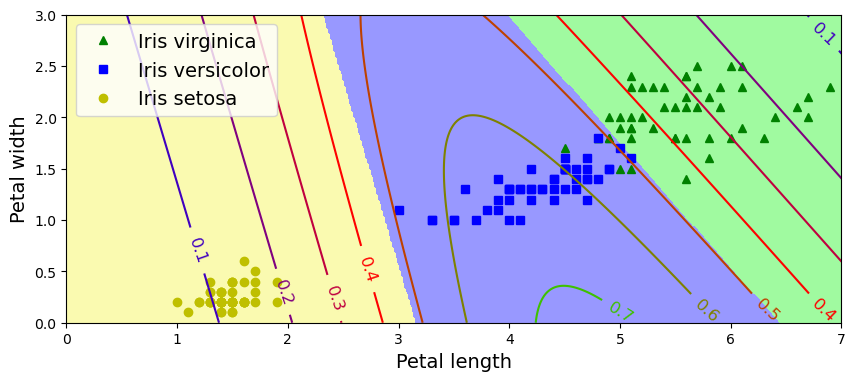

In [54]:
import matplotlib.pyplot as plt

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 4, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3])
plt.show()